In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter 
import matplotlib
import pickle

In [3]:
df = pd.read_csv(
        '../reddit_trimmed.csv',
        engine="c",
        dtype={'timestamp':np.uint16,
          'user_id':np.uint32,
          'pixel_color':np.uint8,
          'x':np.uint16,
          'y':np.uint16,})

# Number of tiles modified by each user

In [5]:
user_dict= {}
row_counter = 0
ltot = len(df)

for row in df.itertuples():
    user = row.user_id
    x = row.x
    y = row.y
    
    if  user in user_dict:
        user_dict[user] = user_dict[user] + 1 
    else:
        user_dict[user] = 1
    row_counter = row_counter + 1
    
    if (row_counter % 5e6) == 0:
        print(f'{row_counter / ltot * 100:.2f}')
        
with open('plot/user_distrib.pkl', 'wb') as handle:
    pickle.dump(user_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

3.12
6.24
9.35
12.47
15.59
18.71
21.83
24.94
28.06
31.18
34.30
37.42
40.54
43.65
46.77
49.89
53.01
56.13
59.24
62.36
65.48
68.60
71.72
74.83
77.95
81.07
84.19
87.31
90.43
93.54
96.66
99.78


In [ ]:
print(len(list(user_dict.keys())))

In [10]:
with open('plot/user_distrib.pkl', 'rb') as handle:
    user_dict = pickle.load(handle)

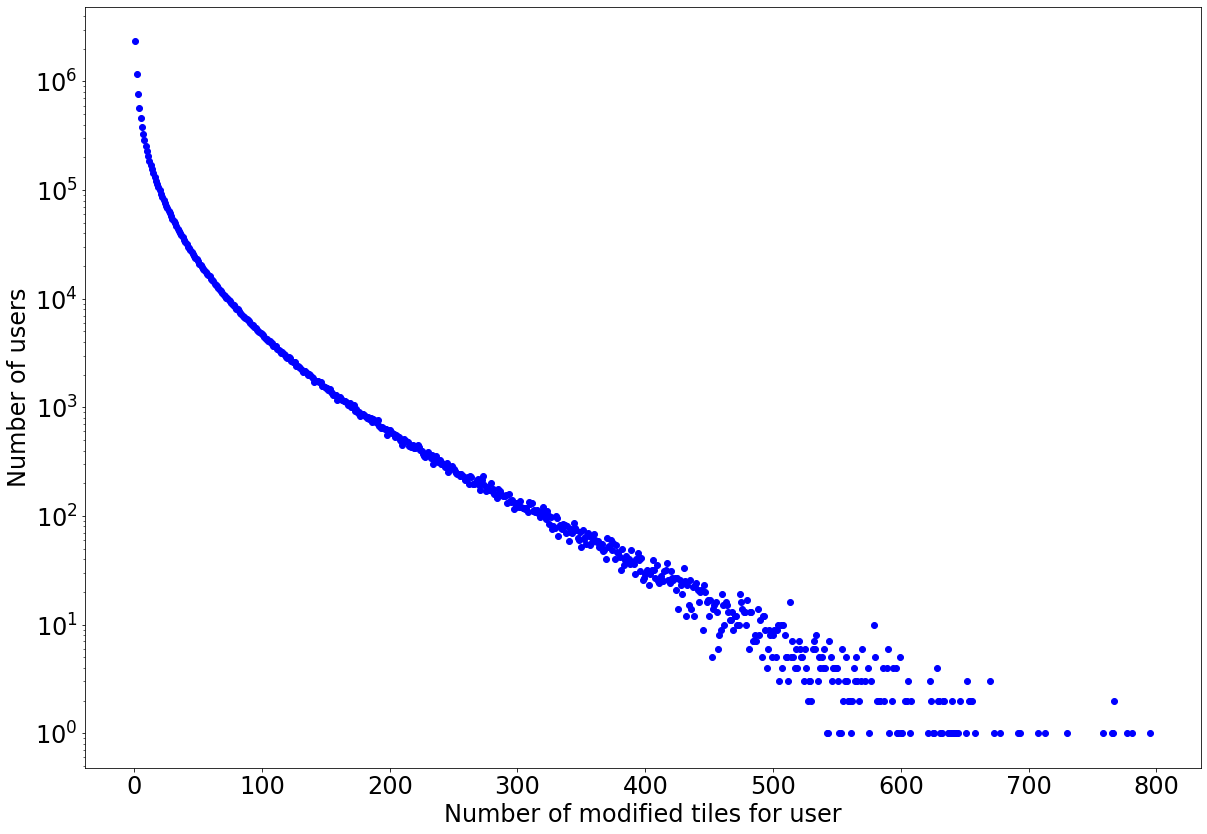

In [15]:
degin_distri=Counter(user_dict.values())
x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i])

plt.figure(figsize=(20,14),)    
plt.plot(x,y,'bo')

plt.xlabel('Number of modified tiles for user', fontsize=24)
plt.ylabel('Number of users', fontsize=24)


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.yscale('log')
plt.xscale('linear')
#plt.axis([9e-1,500,0.00001,1e-1])
plt.savefig('plot/number_of_tiles.png',dpi = 300,backend = 'cairo')

# Heatmap of the most modified tiles

In [3]:
heatmap = np.zeros(shape = (2000,2000))

row_counter = 1
ltot = len(df)

for row in df.itertuples():
    x = row.x
    y = row.y
    heatmap[x,y] = heatmap[x,y] + 1 
    if (row_counter % 5e6) == 0:
        print(f'{row_counter / ltot * 100:.2f}')
    row_counter = row_counter + 1
    


3.12
6.24
9.35
12.47
15.59
18.71
21.83
24.94
28.06
31.18
34.30
37.42
40.54
43.65
46.77
49.89
53.01
56.13
59.24
62.36
65.48
68.60
71.72
74.83
77.95
81.07
84.19
87.31
90.43
93.54
96.66
99.78


In [5]:
np.save('plot/heatmap.npy',heatmap)

In [116]:
ind = np.unravel_index(np.argmax(heatmap, axis=None), heatmap.shape)
print('position',ind)
print(heatmap[ind])

position (0, 0)
98807.0


In [129]:
ind = np.unravel_index(np.argmin(heatmap, axis=None), heatmap.shape)
print('position',ind)
print(heatmap[ind])

position (45, 1197)
0.0


In [127]:
print('Number of pixel never modified: ',2000*2000 - len(heatmap.nonzero()[0]))

numero di pixel mai modificati:  3966


In [90]:
heatmap = heatmap / np.linalg.norm(heatmap, axis=-1)[:, np.newaxis]
heatmap.shape

(2000, 2000)

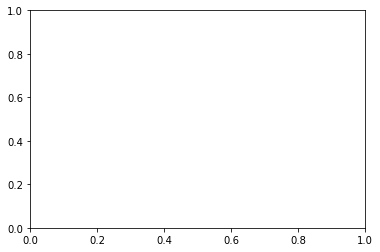

In [5]:
fig, ax = plt.subplots()
fig.

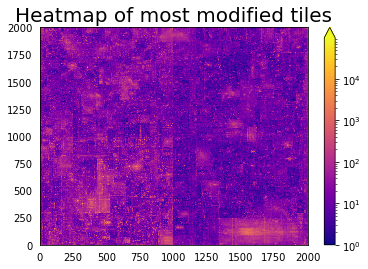

In [3]:
import matplotlib.colors as colors
heatmap = np.load('plot/heatmap.npy')
#fig,ax = plt.figure(figsize=(20,14),) 
fig, ax = plt.subplots()
pcm = ax.pcolor(heatmap,
                   norm=colors.LogNorm(vmin=1, vmax=heatmap.max()),
                   cmap='plasma')
fig.colorbar(pcm,extend='max')
ax.tick_params(left=False, bottom=False) 
plt.title('Heatmap of most modified tiles',fontsize=20)
plt.show()
fig.savefig('plot/heatmap.png',dpi = 100,backend = 'cairo')

# Rate of tiles edited


In [ ]:
df = pd.read_csv(
        'data/reddit_trimmed.csv',
        engine="c",usecols=['timestamp'],
        dtype={'timestamp':np.uint16,})

In [ ]:
l = {}
row_counter = 1
ltot = len(df)

for row in df.itertuples():
    timestamp = row.timestamp
    if timestamp in l:
        l[timestamp] = l[timestamp] + 1
    else:
        l[timestamp] = 1
    if (row_counter % 5e6) == 0:
        print(f'{row_counter / ltot * 100:.2f}')
    row_counter = row_counter + 1
    
with open('plot/rate.pkl', 'wb') as handle:
    pickle.dump(l, handle, protocol=pickle.HIGHEST_PROTOCOL)

3.12
6.24
9.35
12.47
15.59
18.71
21.83
24.94
28.06
31.18
34.30
37.42
40.54
43.65
46.77
49.89
53.01
56.13
59.24
62.36
65.48
68.60
71.72
74.83
77.95
81.07
84.19
87.31
90.43
93.54
96.66
99.78


In [ ]:
with open('plot/rate.pkl', 'rb') as handle:
    l = pickle.load(handle)

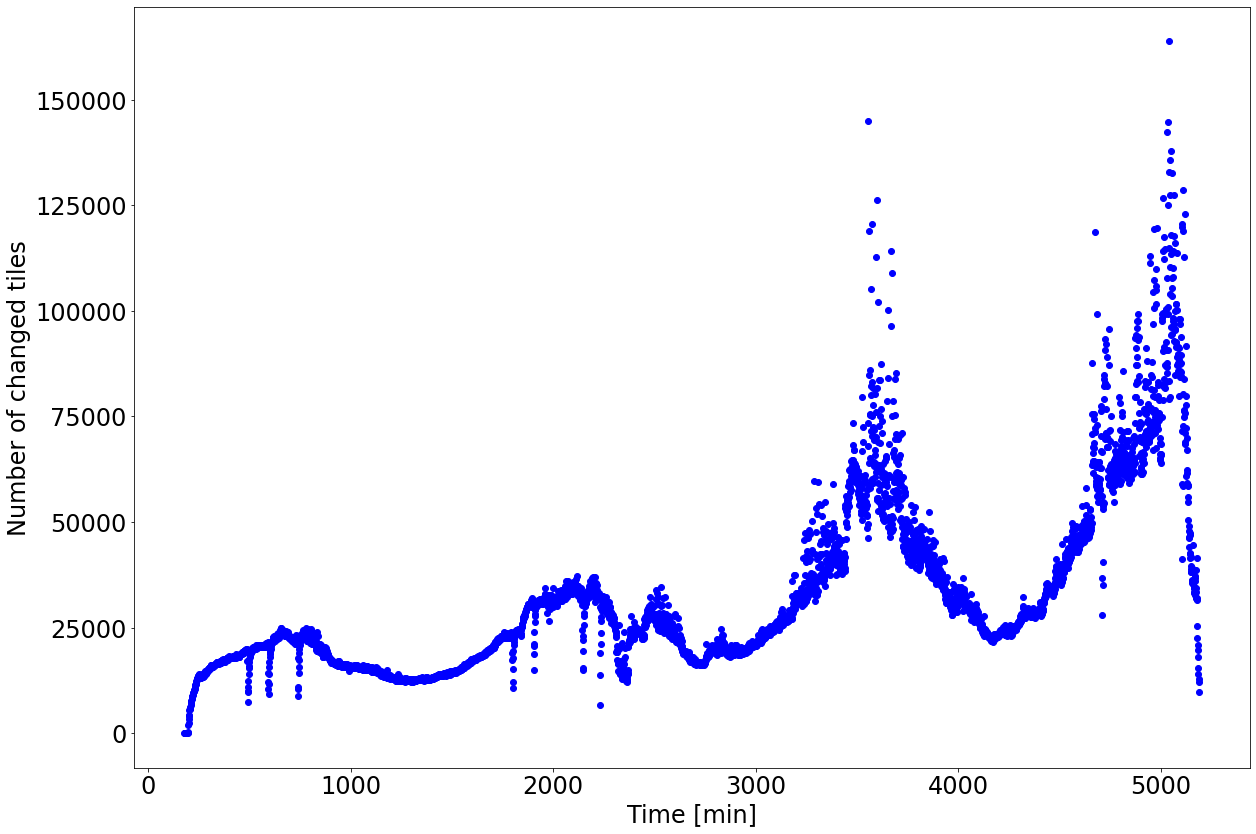

In [18]:
plt.figure(figsize=(20,14),)    
plt.plot(list(l.keys()),list(l.values()),'bo')


plt.xlabel('Time [min]', fontsize=24)
plt.ylabel('Number of changed tiles', fontsize=24)


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.yscale('linear')
plt.xscale('linear')
#plt.axis([0,2e5,0,200])
plt.savefig('plot/time_distribution.png',dpi = 300,backend = 'cairo')

# Area distribution

In [20]:
df = pd.read_csv("data/artworks_ordered.csv")

l = []
for row in df.itertuples():
    l.append(row.area)
len(l)

8180

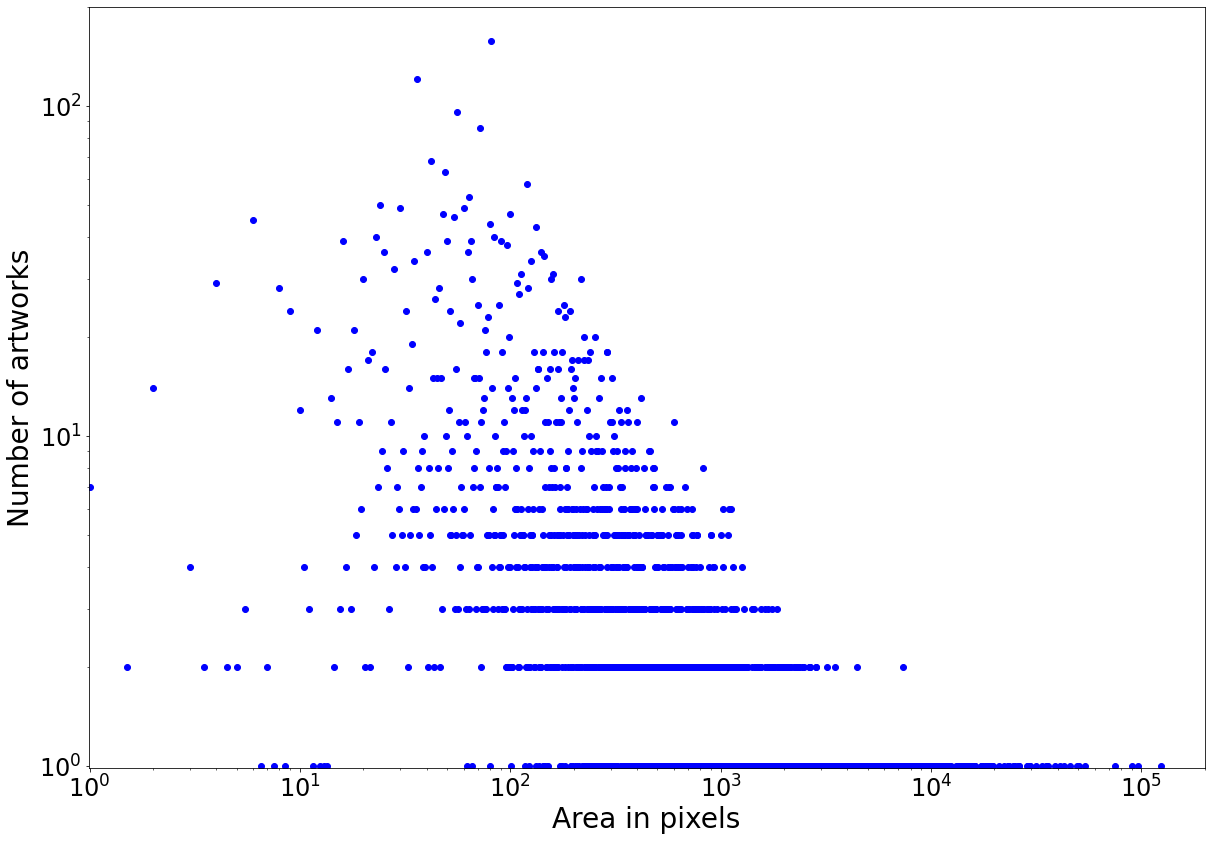

In [25]:
degin_distri=Counter(l)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i])

plt.figure(figsize=(20,14),)    
plt.plot(x,y,'bo')

plt.xlabel('Area in pixels', fontsize=28)
plt.ylabel('Number of artworks', fontsize=28)


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.yscale('log')
plt.xscale('log')
plt.axis([0.99,2e5,0.99,200])
plt.savefig('plot/area_distribution.png',dpi = 300,backend = 'cairo')